Iniziamo abilitando subito l'estensione `autoreload`

In [1]:
%load_ext autoreload
%autoreload 2

# Funzioni come Oggetti

## Un Esempio di Motivazione

**Supponiamo di voler _approssimare la derivata di una funzione $f: \mathbb{R} \to \mathbb{R}$_**

Sappiano che la derivata è definita come segue:

$$
\frac{df}{dx}(x) = \lim_{\varepsilon \to 0} \frac{f(x+\varepsilon) - f(x)}{\varepsilon}
$$

Se scegliamo un valore di $\varepsilon$ piuttosto piccolo (diciamo $\hat{\varepsilon}$) avremo che:

$$
\frac{df}{dx}(x) \simeq \frac{f(x+\hat{\varepsilon}) - f(x)}{\hat{\varepsilon}}
$$

* L'espressione a dx è facilmente calcolabile
* ...A meno di [problemi numerici](https://en.wikipedia.org/wiki/Numerical_differentiation), che però non approfondiremo

In pratica si usano formule più numericamente stabili, ma a noi questa andrà bene

## Un Esempio di Motivazione

**Se conosciamo la funzione $f$, è facile implementare la formula in Python**

Supponiamo di voler derivare $x e^{\cos(x)}$

In [2]:
import numpy as np

def num_der(x):
    h = np.sqrt(np.finfo(float).eps)
    df = (x + h) * np.exp(np.cos(x+h)) - (x) * np.exp(np.cos(x))
    return df / h

num_der(0)

2.718281828459045

* L'espressione `np.finfo(float).eps` restituisce l'$\varepsilon$ di macchina per il tipo `float`
* ...Ossia il più piccolo valore `float` rappresentabile nell'interprete

## Un Esempio di Motivazione

**Possiamo anche disegnare il grafico della derivata (e.g. in $[0, 2\pi]$**

...Allo scopo useremo una funzione dal modulo `util` fornito con questa lezione

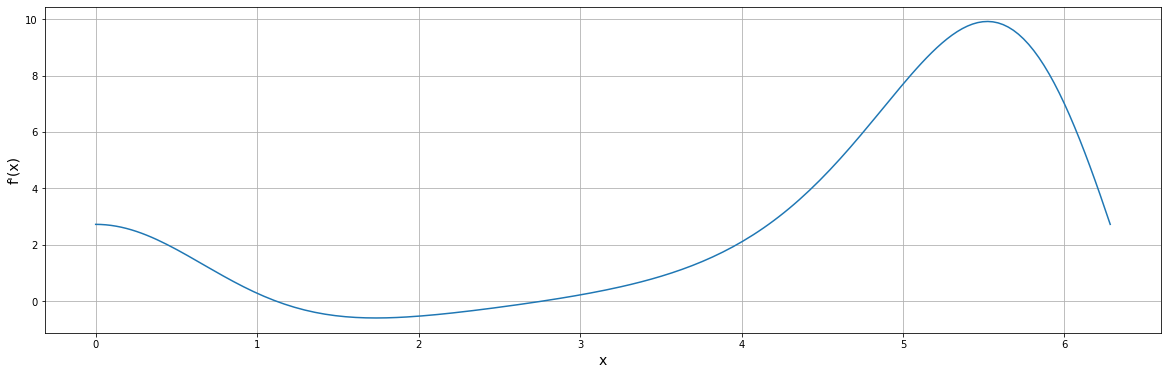

In [3]:
import numpy as np
from example import util
x = np.linspace(0, 2*np.pi, 200)
util.plot(x, num_der(x), xlabel='x', ylabel='f\'(x)', figsize=(20, 6))

## Funzioni come Dati

**L'approccio che abbiamo usato _è valido per ogni funzione $f$_**

...Ma il nostro codice funzione solo per $x e^{\cos(x)}$

* Per generalizzarlo dovremmo poter _specificare la funzione da utilizzare_
* ...E dovremmo poterlo fare _al momento della chiamata_

**In pratica, la funzione da valutare dovrebbe essere un parametro di ingresso**

Per esempio potremmo immaginare di avere qualcosa del genere:

```python
def num_der(f, x):
    h = np.sqrt(np.finfo(float).eps)
    df = f(x+h) - f(x)
    return df / h
```

* `f` è un parametro di ingresso (come al solito)
* ...Solo che nel codice _lo possiamo eseguire come una funzione_

## Funzioni come Dati

**La cosa interessante è che _funziona per davvero_**

In [4]:
def num_der(f, x):
    h = np.sqrt(np.finfo(float).eps)
    df = f(x+h) - f(x)
    return df / h

def my_f(x):
    return x * np.exp(np.cos(x))

num_der(my_f, 0)

2.718281828459045

**In Python _le funzioni sono dati_ ed _i nomi di funzione sono variabili_**

* Quindi le possiamo assegnare a variabili e passare come argomento
* Nel codice sopra, il parametro `f` viene riempito con il contenuto di `my_f`

## Funzioni come Dati

**La cosa interessante è che _funziona per davvero_**

In [5]:
def num_der(f, x):
    h = np.sqrt(np.finfo(float).eps)
    df = f(x+h) - f(x)
    return df / h

def my_f(x):
    return x * np.exp(np.cos(x))

num_der(my_f, 0)

2.718281828459045

**La notazione con le parentesi tonde (e.g. `f(x)`) si chiama _operatore di esecuzione_**

* Si applicata ad una funzione (e.g. ottenuta da una variabile o espressione)
* Indica all'interprete che la funzione deve essere eseguita

## Funzioni come Dati

**Vediamo qualche esempio generico**

Si può assegnare una funzione ad una variabile:

In [6]:
def my_f(x):
    return x * np.exp(np.cos(x))

f = my_f
f(np.pi)

1.1557273497909217

Si può cercare di eseguire una variabile che non contiene una funzione

* ...Anche e ovviamente così facendo si ottiene un errore

In [1]:
f = 10
f(np.pi)

NameError: name 'np' is not defined

## Classi Funzione

**È possibile creare classi che si comportino come funzioni**

...Basta ridefinire l'operatore di esecuzione!

In [7]:
class PowerOf:
    def __init__(self, base):
        self.base = base
    
    def __call__(self, x):
        return self.base**x

Possiamo istanziare `PowerOf` come al solito

* Quando costruiamo un istanza, specifichiamo il parametro `base`

Possiamo eseguire un oggetto di tipo `PowerOf`

* Quando lo facciamo, viene eseguito il metodo `__call__`

## Classi Funzione

**Vediamo un esempio di utilizzo**

In [8]:
power_of_2 = PowerOf(2)
power_of_3 = PowerOf(3)
x = 2

print(f1(x))
print(f2(x))

4
9


* `PowerOf(2)` restituisce un oggetto `PowerOf` con `base = 2`
* `PowerOf(3)` restituisce un oggetto `PowerOf` con `base = 3`
* Chiamano i due ogggetti con `x = 2` otteniamo `2**2` e `3**2`
* Al momento della chiamata, il parametro `self` è passato automaticamente
  - È il comportamento normale dei metodi in Python
  - ...Ed in pratica vuol dire che alla chiamata passiamo solo `x`